<a href="https://colab.research.google.com/github/Chaitrakamat21/Chaitrakamat-Portfolio/blob/main/Bank_customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning Objective:-
1. Data encoding
2. Feature scaling
3. Handling imbalance data
  a. random under sampling
  b. random over sampling
4. Support vector machine classifier  
5. Grid searching for hyperparameter
  tunning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df = df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [ ]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

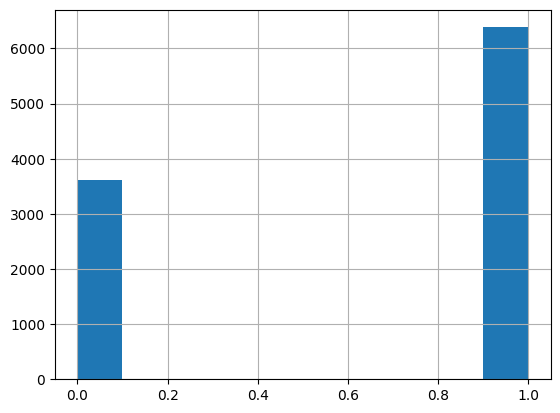

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

DEFINE LABEL AND FEATURES

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
X = df.drop(['Surname','Churn'],axis=1)

In [ ]:
Y = df['Churn']

In [ ]:
X.shape,Y.shape

((10000, 11), (10000,))

**HANDLING IMBALANCED DATA** :-
Class imbalance is common probem in ML, especially in classification problems as ML algorithms are designed to maximize accuracy and reduce errors. If the data set is imbalance then in such cases,just by predicting the majority class we get a pretty high accuracy,but fails to capture the minority class, which is most often the point of creating the model in the first place like in

1. fraud detection
2. spam filtering
3. diseases screening
4. online sales churn
5. advertising click-thoughs

**UNDERSAMPLING**:- can be defined as removing some observations of the majority class. This is done until the manority class is balanced out.Undersampling can be a good choice when you have a ton of data-think millons of rows.But a drawback to undersampling is that we are removing information that may be valuable.
*Drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set.



**OVERSAMPLING**:-can be defined as adding more copies to the minority class.Oversampling can be a goodchoice when you don't have a ton of data to wok with.
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

*SAMPLING*

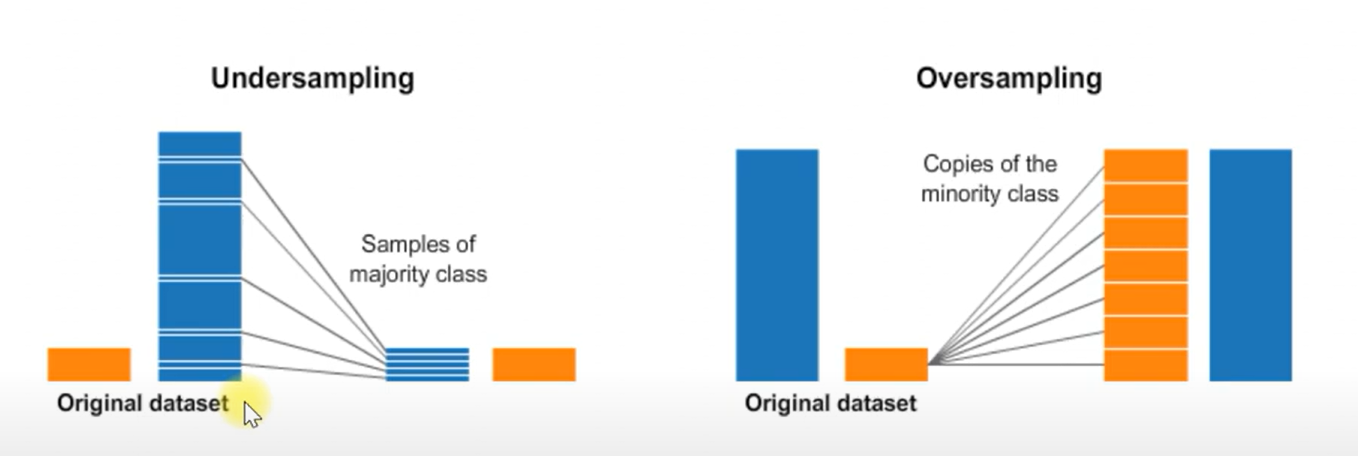






**Undersampling**

In [ ]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

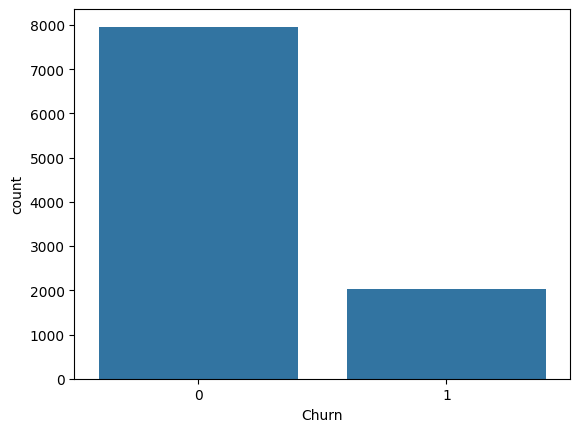

In [ ]:
sns.countplot(x='Churn',data=df);

In [ ]:
X.shape , Y.shape

((10000, 11), (10000,))

**Random under sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus=RandomUnderSampler(random_state=42)
X_rus,Y_rus=rus.fit_resample(X,Y)

In [ ]:
X_rus.shape , Y_rus.shape,X.shape,Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
Y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

In [ ]:
Y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

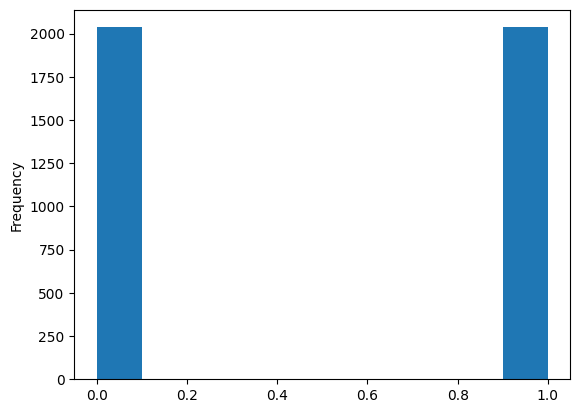

In [ ]:
Y_rus.plot(kind='hist')

**RAMBON OVER SAMPLING**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler(random_state=42)
X_ros,Y_ros=ros.fit_resample(X,Y)

In [ ]:
X_ros.shape , Y_ros.shape,X.shape,Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
Y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

In [ ]:
Y_train_rus.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

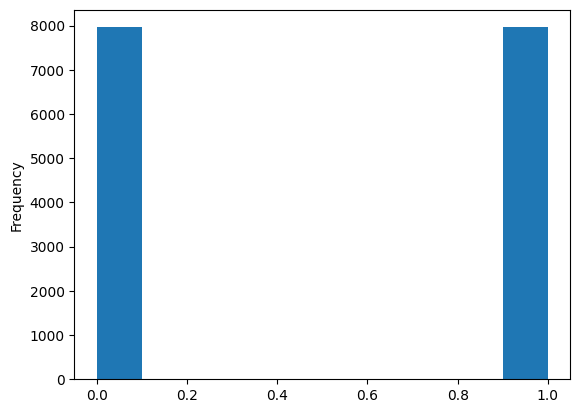

In [ ]:
Y_ros.plot(kind='hist')

**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

Split original data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(Y,test_size=0.3,random_state=25)

Split random under sample data

In [ ]:
X_train_rus,X_test_rus,Y_train_rus,Y_test_rus=train_test_split(X_rus,Y_rus,test_size=0.3,random_state=25)

Split random over sample data

In [ ]:
X_train_ros,X_test_ros,Y_train_ros,Y_test_ros=train_test_split(X_ros,Y_ros,test_size=0.3,random_state=25)

**STANDARDDIZE FEATURES**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

Standardize original data

In [ ]:
X_train[['CreditScore','Age','Tenure','Balance', 'Estimated Salary']] == sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance', 'Estimated Salary']])

,CreditScore,Age,Tenure,Balance,Estimated Salary
CustomerId,,,,,
15610912,False,False,False,False,False
15776824,False,False,False,False,False
15798084,False,False,False,False,False
15569249,False,False,False,False,False
15771509,False,False,False,False,False
...,...,...,...,...,...
15721292,False,False,False,False,False
15792627,False,False,False,False,False
15690188,False,False,False,False,False


In [ ]:
X_test[[ 'CreditScore','Age','Tenure','Balance', 'Estimated Salary']] == sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance', 'Estimated Salary']])

,CreditScore,Age,Tenure,Balance,Estimated Salary
CustomerId,,,,,
15629094,False,False,False,False,False
15690440,False,False,False,False,False
15678333,False,False,False,False,False
15709861,False,False,False,False,False
15620579,False,False,False,False,False
...,...,...,...,...,...
15640866,False,False,False,False,False
15585133,False,False,False,False,False
15591698,False,False,False,False,False


Standardize random under sapmple  data

In [ ]:
X_train_rus[['CreditScore','Age','Tenure','Balance']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance']])

In [ ]:
X_test_rus[['CreditScore','Age','Tenure','Balance']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance']])

Standardize random over sample data

In [ ]:
X_train_ros[['CreditScore','Age','Tenure','Balance']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance']])

In [ ]:
X_test_ros[['CreditScore','Age','Tenure','Balance']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance']])

***SUPPORT VECTOR MACHINE CLASSIFIER***

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train,Y_train)

SVC()

In [ ]:
Y_pred = svc.predict(X_test)

model with random  under sampling

In [ ]:
svc_rus=SVC()

In [ ]:
svc_rus.fit(X_train_rus,Y_train_rus)

SVC()

In [ ]:
Y_pred_rus=svc_rus.predict(X_test_rus)

model with random over sampling

In [ ]:
svc_ros=SVC()

In [ ]:
svc_ros.fit(X_train_ros, Y_train_ros)

SVC()

In [ ]:
Y_pred_ros=svc_ros.predict(X_test_ros)

**MODEL ACCURACY**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[2419,    0],
       [ 581,    0]])

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model rus

In [ ]:
confusion_matrix(Y_test_rus,Y_pred_rus)

array([[399, 204],
       [411, 209]])

In [ ]:
print(classification_report(Y_test_rus,Y_pred_rus))

              precision    recall  f1-score   support

           0       0.49      0.66      0.56       603
           1       0.51      0.34      0.40       620

    accuracy                           0.50      1223
   macro avg       0.50      0.50      0.48      1223
weighted avg       0.50      0.50      0.48      1223



model ros

In [ ]:
confusion_matrix(Y_test_ros, Y_pred_ros)

array([[2065,  361],
       [2091,  261]])

In [ ]:
print(classification_report(Y_test_ros,Y_pred_ros))

              precision    recall  f1-score   support

           0       0.50      0.85      0.63      2426
           1       0.42      0.11      0.18      2352

    accuracy                           0.49      4778
   macro avg       0.46      0.48      0.40      4778
weighted avg       0.46      0.49      0.40      4778



**HYPERPARAMETER TUNNING**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions=grid.predict(X_test)

In [ ]:
confusion_matrix(Y_test,grid_predictions)

array([[2419,    0],
       [ 581,    0]])

In [ ]:
print(classification_report(Y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hyperparameter tunning for rus

In [ ]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [ ]:
grid_rus= GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus=grid.fit(X_train_rus,Y_train_rus)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_rus=grid_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(Y_test_rus,grid_predictions_rus)

array([[603,   0],
       [620,   0]])

In [ ]:
print(classification_report(Y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


hyperparameter tuning for ros

In [ ]:
param_grid={'C': [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [ ]:
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [ ]:
confusion_matrix(Y_test_ros,grid_predictions_ros)

array([[2426,    0],
       [ 149, 2203]])

In [ ]:
print(classification_report(Y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2426
           1       1.00      0.94      0.97      2352

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778



Accuracy=97% in ROS(random over sampling)